In [12]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

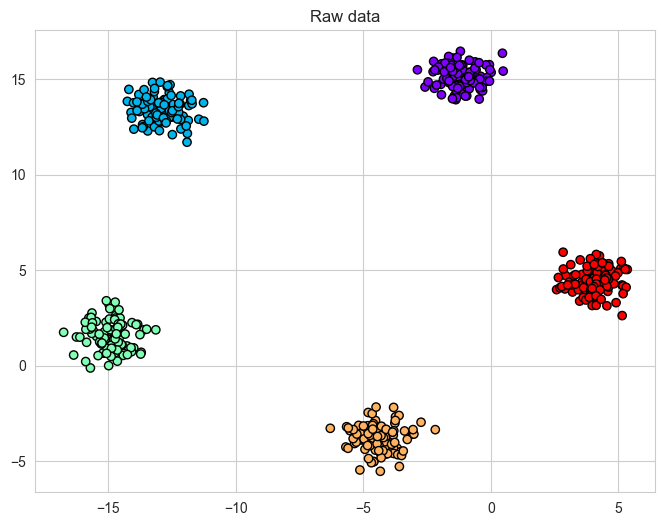

In [13]:
# load data
data = np.loadtxt('tren_data1___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [14]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot
def to_one_hot(y, num_classes):
    y = y.astype(int)
    one_hot = np.zeros((num_classes, y.shape[0]), dtype=int)
    for i in range(y.shape[0]):
        one_hot[y[i]-1, i] = 1
    return one_hot
y_train = to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [15]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


In [16]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer, 10, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.sigmoid])
parameters = nn.parameters
costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 100, batch_size=1, print_cost = True)

Training model...
Cost after epoch 0: [0.00224353 0.01164559 0.10145044 0.01552175 0.00015606]
Cost after epoch 1: [0.00721014 0.00400263 0.01485041 0.01279833 0.00675724]
Cost after epoch 2: [2.15674049e-05 1.00460032e-02 1.87690847e-02 3.49572910e-03
 3.30824996e-07]
Cost after epoch 3: [0.03145772 0.0182066  0.00388305 0.00027017 0.00147481]
Cost after epoch 4: [7.54025014e-03 4.35873399e-05 7.69139248e-04 1.23070395e-03
 2.64828187e-03]
Cost after epoch 5: [5.01577381e-03 7.33945293e-03 2.14036684e-03 7.87568696e-07
 1.89641644e-08]
Cost after epoch 6: [8.75603855e-04 2.34364830e-03 1.35304789e-03 8.61943277e-08
 6.96881886e-10]
Cost after epoch 7: [2.67235968e-03 3.00477577e-03 1.14035401e-03 2.20719467e-07
 4.05443724e-09]
Cost after epoch 8: [5.27466077e-03 2.51632934e-03 1.28799805e-03 9.81361333e-05
 7.80934331e-04]
Cost after epoch 9: [4.29437756e-07 1.26631738e-03 1.66171428e-03 3.26248781e-04
 2.08825091e-09]
Cost after epoch 10: [1.44758765e-07 7.46644221e-05 9.47816196e-0

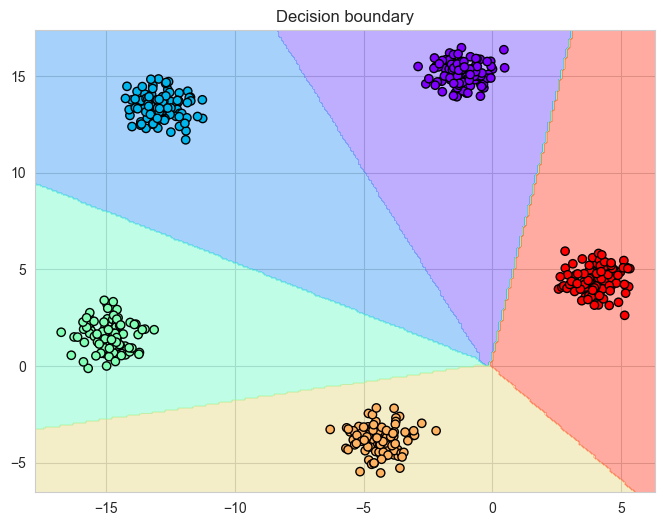

In [17]:
%matplotlib inline
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [18]:
A = nn.forward_propagation(x_test)

accuracy:        1.0
confusion matrix: 


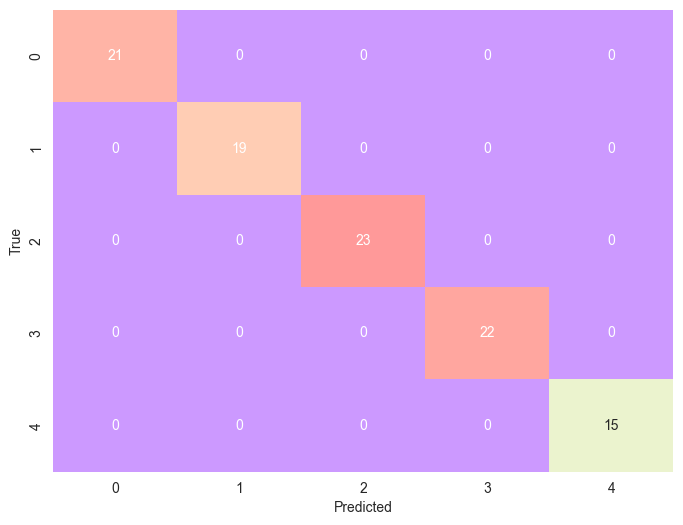

In [19]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [20]:
print(A.shape[0])
preds = np.argmax(A, axis=0)
print(preds)
print(np.array(y_test, dtype=int)[0])
import seaborn as sns
colors = sns.color_palette(palette='Set2')
print(colors)

5
[1 0 3 2 4 0 2 1 4 2 2 1 1 0 4 1 3 3 2 1 1 2 4 1 1 2 3 2 3 0 1 0 0 2 3 1 3
 3 0 0 0 2 0 4 0 4 3 4 0 1 4 1 4 2 2 2 3 3 0 3 0 3 3 0 4 1 0 3 2 2 0 0 3 4
 1 2 3 4 4 3 2 2 1 2 3 2 0 4 1 1 4 3 1 2 3 2 0 3 2 0]
[2 1 4 3 5 1 3 2 5 3 3 2 2 1 5 2 4 4 3 2 2 3 5 2 2 3 4 3 4 1 2 1 1 3 4 2 4
 4 1 1 1 3 1 5 1 5 4 5 1 2 5 2 5 3 3 3 4 4 1 4 1 4 4 1 5 2 1 4 3 3 1 1 4 5
 2 3 4 5 5 4 3 3 2 3 4 3 1 5 2 2 5 4 2 3 4 3 1 4 3 1]
[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


In [21]:
# from IPython.display import clear_output
# from matplotlib import pyplot as plt
# import collections
# %matplotlib inline
# 
# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show()
#     
#     
# # Then in a loop you populate a dictionary and you pass it to live_plot():
# 
# data = collections.defaultdict(list)
# for i in range(100):
#     data['foo'].append(np.random.random())
#     data['bar'].append(np.random.random())
#     data['baz'].append(np.random.random())
#     live_plot(data)

In [22]:
nn.cost_history

[0.28519863417165453,
 0.11197676691925251,
 0.02254279888999731,
 0.00772670917223963,
 0.004763482666225159,
 0.0033951861224202793,
 0.0026285769532985856,
 0.0021366525404971936,
 0.0017971395768450699,
 0.0015451185156124146,
 0.0013535736698593497,
 0.001200325591175779,
 0.0010785632998736993,
 0.0009775106884099898,
 0.000892285529138932,
 0.0008226946520822524,
 0.0007610801152272765,
 0.0007069922063924732,
 0.0006609328171005939,
 0.0006196659774983709,
 0.0005828764147300611,
 0.0005502042207527078,
 0.0005210653022713469,
 0.0004945166176964832,
 0.0004705650059065338,
 0.0004485337640867567,
 0.00042835295270275274,
 0.0004100350382698371,
 0.0003928867591370442,
 0.00037720190588759006,
 0.0003626326679773731,
 0.00034907745154701646,
 0.00033640215622400115,
 0.0003248003399275357,
 0.000313760436129078,
 0.00030347380111425465,
 0.0002937274632194787,
 0.0002845612596104326,
 0.00027602294634667453,
 0.0002679252468900455,
 0.00026023705217224176,
 0.000252966266504870